**CONVOLUTIONAL CLASSIFIER**

In [3]:
from matplotlib import pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

In [4]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

2024-05-17 12:09:33.082495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
image = tf.io.read_file('car_illus.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

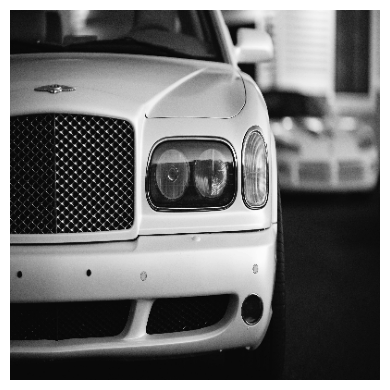

In [6]:
img = tf.squeeze(image).numpy()
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

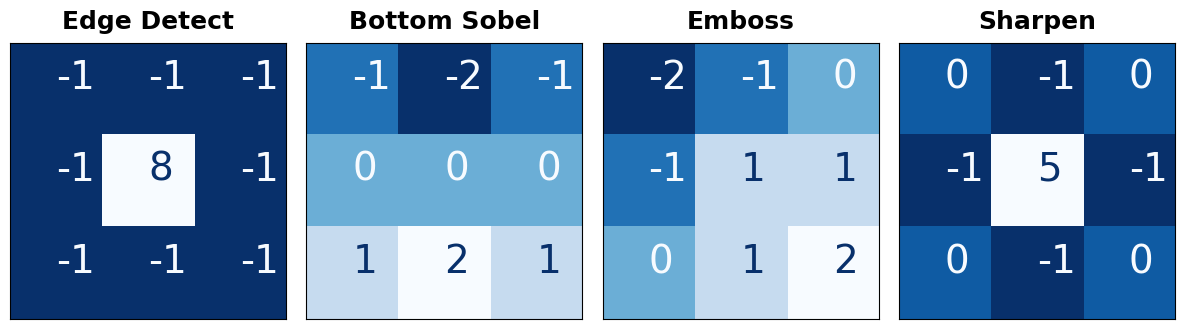

In [11]:
import numpy as np
from itertools import product

def show_kernel(kernel):
  kernel = np.array(kernel)
  cmap = plt.get_cmap('Blues_r')
  plt.imshow(kernel, cmap=cmap)
  rows, cols = kernel.shape
  thresh = (kernel.max() + kernel.min()) / 2
  for i, j in product(range(rows), range(cols)):
    val = kernel[i, j]
    color = cmap(0) if val > thresh else cmap(255)
    plt.text(j, i, val, color=color, size=28)
  plt.xticks([])
  plt.yticks([])
edge = [
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1],
]
bottom_sobel = [
  [-1, -2, -1],
  [0, 0, 0],
  [1, 2, 1],
]
emboss = [
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2],
]
sharpen = [
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0],
]
kernels = [edge, bottom_sobel, emboss, sharpen]
names = ['Edge Detect', 'Bottom Sobel', 'Emboss', 'Sharpen']
plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
  plt.subplot(1, 4, i+1)
  show_kernel(kernel)
  plt.title(name)
plt.tight_layout()

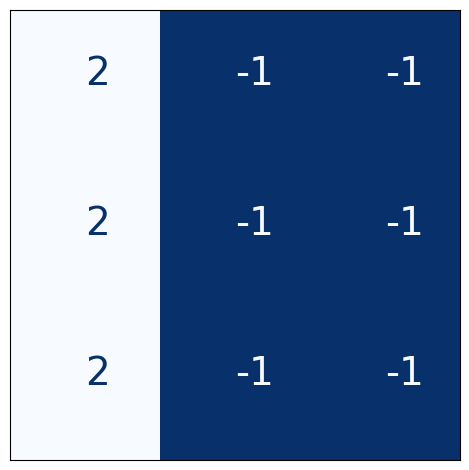

In [29]:
my_kernel = tf.constant([
  [2, -1, -1],
  [2, -1, -1],
  [2, -1, -1],
])
show_kernel(my_kernel)

In [30]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
my_kernel = tf.reshape(my_kernel, [*my_kernel.shape, 1, 1])
my_kernel = tf.cast(my_kernel, dtype=tf.float32)

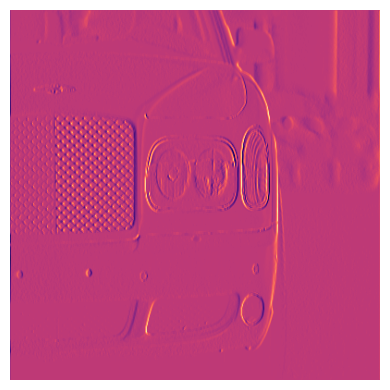

In [31]:
image_filter = tf.nn.conv2d(
  input=image,
  filters=my_kernel,
  strides=1,
  padding='SAME',
)
plt.figure(figsize=(4, 4))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

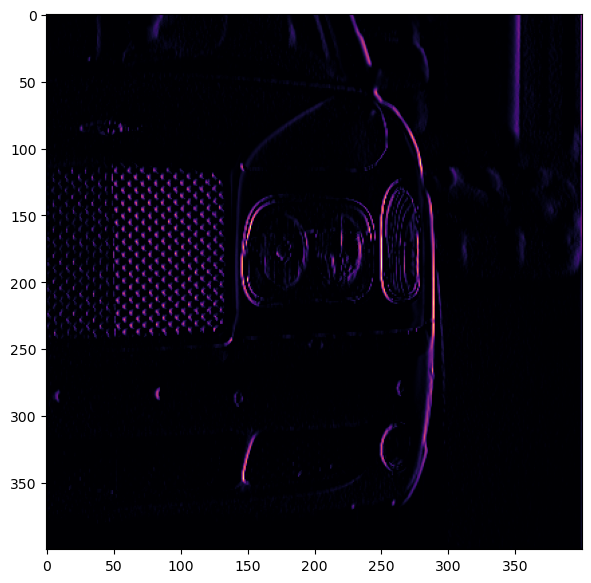

In [33]:
image_detect = tf.nn.relu(image_filter)
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
#plt.axis('off')
plt.show()